# Prudential Life Insurance Assessment

In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Get the Data

In [2]:
df = pd.read_csv('E:/AdvAnal/python_103/1_Data/14_dtree_train.csv')
dft = pd.read_csv('E:/AdvAnal/python_103/1_Data/14_dtree_test.csv')

In [3]:
train = df[df.index < 30000].copy()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 4 columns):
y        30000 non-null int64
22_df    30000 non-null int64
23_df    30000 non-null int64
25_df    30000 non-null int64
dtypes: int64(4)
memory usage: 1.1 MB


In [4]:
test = df[df.index >= 30000].copy()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29381 entries, 30000 to 59380
Data columns (total 4 columns):
y        29381 non-null int64
22_df    29381 non-null int64
23_df    29381 non-null int64
25_df    29381 non-null int64
dtypes: int64(4)
memory usage: 1.1 MB


In [5]:
sub = dft
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19765 entries, 0 to 19764
Data columns (total 4 columns):
Id       19765 non-null int64
22_df    19765 non-null int64
23_df    19765 non-null int64
25_df    19765 non-null int64
dtypes: int64(4)
memory usage: 617.7 KB


# Clean the Data

In [6]:
cat_feats = ['22_df', '23_df', '25_df']

In [7]:
y_train = train['y'].copy()
x_train = train.drop('y', 1).copy()
x_train = pd.get_dummies(x_train,columns=cat_feats,drop_first=True).copy()

In [8]:
y_test = test['y'].copy()
x_test = test.drop('y', 1).copy()
x_test = pd.get_dummies(x_test,columns=cat_feats,drop_first=True).copy()

In [9]:
y_df = df['y'].copy()
x_df = df.drop('y', 1).copy()
x_df = pd.get_dummies(x_df,columns=cat_feats,drop_first=True).copy()

In [10]:
y_sub = sub['Id'].copy()
x_sub = sub.drop('Id', 1).copy()
x_sub = pd.get_dummies(x_sub,columns=cat_feats,drop_first=True).copy()

# KNN

In [11]:
error_rate = []
for i in range(6,61,5):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

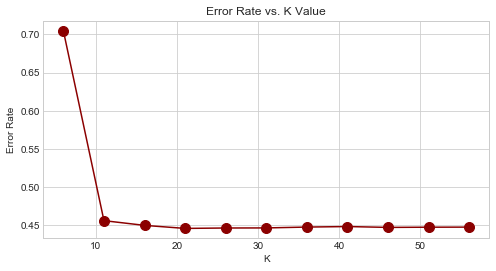

In [12]:
plt.figure(figsize=(8,4))
plt.plot(range(6,61,5),error_rate,color='darkred', marker='o',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [13]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [14]:
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

df_table = confusion_matrix(test_calc['y'],test_calc['predicted'])
print (df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

[[ 824  353   22  150  234 1102  323   42]
 [ 543  852   13   94  275 1157  294   47]
 [  66   36   61  208   39   80   19    4]
 [  41    5   22  454    2  127   54    6]
 [ 242  330    0   10 1042  879  154   23]
 [ 439  284    5   21  315 3870  591  102]
 [ 238  107    0   15   82 1895 1516  109]
 [ 113   55    1   28   23 8774  445  124]]
accuracy: 0.651632970451
precision: 0.707053941909
recall: 0.610752688172
f1 score:  0.655384615385
